# Impact of COVID-19 on Flight Activity from January to July 2020
By: TEAM AWESOMESAUCE

This notebook evaluates the destinations for flights in the two periods of Jan - July 2019 and Jan - July 2020 to answer the following questions: 

**How has the pandemic impacted the carriers?**

**How has the pandemic impacted the domestic and international markets?**

**How has the pandemic impacted travel destinations?**

We retrieved monthly data for international and domestic markets from the US Department of Transportation, Bureau of Transporation Statistics. The data has monthly summaries of passengers with origins and destinations of the flights taken each month and is only current through July 2020. For this reason, we limited our analysis to compare only January to July in 2019 and 2020.

Data Source: [Air Carriers: T-100 Market (All Carriers) from the Bureau of Transportation Statistics, US Department of Transporation](https://www.transtats.bts.gov/Tables.asp?DB_ID=111&DB_Name=Air%20Carrier%20Statistics%20%28Form%2041%20Traffic%29-%20All%20Carriers&DB_Short_Name=Air%20Carriers) 

## Hypotheses

In this notebook, we will use the Independent T Test, a Google heat map, and various plots to evaluate the following hypotheses:

**Null Hypothesis** - There is no statistical significance in the percent change of passengers flying to the US and other countries in 2019 and 2020. 

**Alternative Hypothesis** - There is a statistical significance in the percent change of passengers flying to the US and other countries in 2019 and 2020.

## Findings
The analysis explores the following questsions:

1. How has the pandemic impacted the carriers?
    Top 10 impacted airlines in the US have lost more than 50% of their passengers. On average, the most affected airlines have suffered a reduction of more than 26 million transported passengers. Top 10 impacted airlines represents 74% of passengers lost during January – July 2020 vs 2019.

2. How has the pandemic impacted the domestic and international markets?
    * Covid-19 effected the world and in our project, flights (foregin and domestic), in a major way. The overall data showed that all flights were effected but as you look closer you can possibly see how the rest of the world may have taken the disease a little more serious than the United States
   
    * While there was a instant effect as the world went into lockdown, slowly but surely based on the data, it seems that things are getting back to normal. Internationally it seems that they are openining up the airways at a slower pace than the United States. 
    
    * The Implementation of quarantining as you enter countries may also be a reason for the slow progression of more International Flights. Some states in the United States have tried to implement the rules but mostly countries outside of the United States still have these rules in place and so while all flights are gradually on the uptick, it will be a slower movement for International Flights to get back to or surpass numbers in the past. 

3. How has the pandemic impacted travel destinations? Is there a statistical significance when looking at travel to the US vs travel to other countries? 
    * We can see that the majority of flights saw a substantial decrease in passengers. More than 6000 flights saw a 50 to 75% decrease in passengers. For example, the flight with the most passengers in 2019 saw a significant decrease in passengers between February and March of 2020. 
    
    * We created a heatmap to display the cities with the greatest change in passengers traveling to their airports and investigate two hot spots - Knoxville, TN and Sarasota, FL. ![Destination Heat Map](images/Destination_PercentChange_Heatmap.png) Both of these cities saw a large increase in travellers coming to their cities due to the addition of flights. There were only four countries that saw a positive change in the amount of passengers traveling to their countries where the change was greater than or equal to 100%: Samoa (2,142%), Suriname (1,316%), Costa Rica (270%), and the United States (170%).

    * We ran a linear regression and correlation analysis to investigate if there was a relationship between the flight distance and percent change in passengers. However, the correlation coefficient of -0.03 shows a very weak negative correlation between flight distance and precent change in the number of passengers.

    * We then ran an Independent T Test looking at flights destined for the US versus flights destined for other countries.This test showed a very high statistical significance in the difference between the percent change of passengers on these flights with a pvalue of 0.0045. 
 
These findings confirm the Alternative Hypothesis that there is a statistical significance in the percent change of passengers flying to domestic and international locations in 2019 and 2020.



In [1]:
!pip install seaborn

In [21]:
#import dependencies
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.widgets import TextBox
import pandas as pd
import scipy.stats as stats
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress
import gmaps
from api_keys import g_key
import requests
import json 
from datetime import date
import seaborn as sns

#get data
flightdata = pd.read_csv('output_data/flightdata.csv')

## Carrier Analysis


In [3]:
# Read CSV file
Carrier_Data_df = flightdata


In [4]:
# Count lines in each colum
Carrier_Data_df.count()

UNIQUE_CARRIER_NAME    235105
ORIGIN                 235105
ORIGIN_CITY_NAME       235105
ORIGIN_STATE_ABR       216096
ORIGIN_STATE_NM        216096
ORIGIN_COUNTRY         235105
ORIGIN_COUNTRY_NAME    235105
ORIGIN_WAC             235105
DEST                   235105
DEST_CITY_NAME         235105
DEST_STATE_ABR         216363
DEST_STATE_NM          216363
DEST_COUNTRY           235105
DEST_COUNTRY_NAME      235105
DEST_WAC               235105
YEAR                   235105
QUARTER                235105
MONTH                  235105
DISTANCE_GROUP         235105
PASSENGERS             235105
DISTANCE               235105
CLASS                  235105
flight                 235105
dtype: int64

In [5]:
# Group per year
Carrier_Data_df2019 = Carrier_Data_df.loc[Carrier_Data_df['YEAR']==2019,:]
Carrier_Data_df2020 = Carrier_Data_df.loc[Carrier_Data_df['YEAR']==2020,:]

In [6]:
# used pivot table function to create dataframe for plot

Carrier_Analysis = pd.pivot_table(Carrier_Data_df2019, values='PASSENGERS', index='UNIQUE_CARRIER_NAME',
                    aggfunc=np.sum)
Carrier_Analysis['2019 Total'] = Carrier_Analysis.sum(axis=1)
Carrier_Analysis['2020 Total'] = Carrier_Analysis.sum(axis=1)

Carrier_Analysis

,PASSENGERS,2019 Total,2020 Total
UNIQUE_CARRIER_NAME,,,
40-Mile Air,281.0,281.0,562.0
ABC Aerolineas SA de CV dba Interjet,1372860.0,1372860.0,2745720.0
"ADVANCED AIR, LLC",15719.0,15719.0,31438.0
Aer Lingus Plc,1295915.0,1295915.0,2591830.0
"Aeroenlaces Nacionales, S.A. de C.V. d/b/a VivaAerobus",262990.0,262990.0,525980.0
...,...,...,...
Warbelow,2606.0,2606.0,5212.0
Westjet,3239371.0,3239371.0,6478742.0
Wright Air Service,32374.0,32374.0,64748.0


In [7]:
# Sort to select top 10 airlines in 2019
Sorted_Carrier = Carrier_Analysis.sort_values("2019 Total", ascending=False)
Sorted_Carrier.head(10)

,PASSENGERS,2019 Total,2020 Total
UNIQUE_CARRIER_NAME,,,
Southwest Airlines Co.,95064991.0,95064991.0,190129982.0
Delta Air Lines Inc.,94095570.0,94095570.0,188191140.0
American Airlines Inc.,90900636.0,90900636.0,181801272.0
United Air Lines Inc.,67928558.0,67928558.0,135857116.0
JetBlue Airways,25213896.0,25213896.0,50427792.0
SkyWest Airlines Inc.,24258967.0,24258967.0,48517934.0
Alaska Airlines Inc.,20463026.0,20463026.0,40926052.0
Spirit Air Lines,19625225.0,19625225.0,39250450.0
Frontier Airlines Inc.,12699564.0,12699564.0,25399128.0


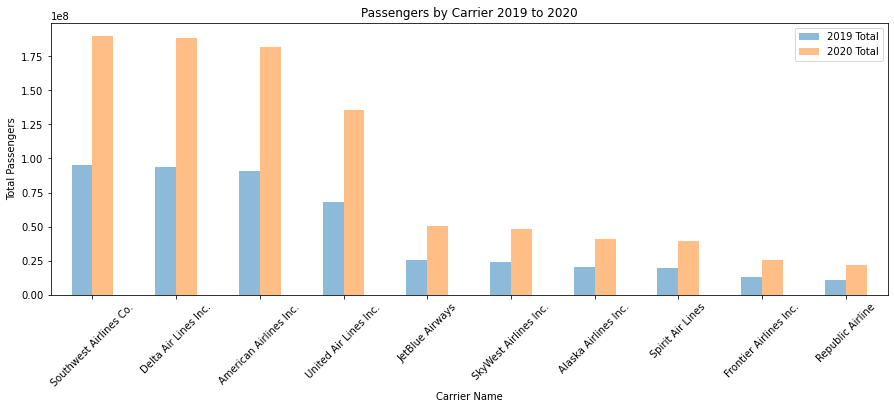

In [8]:
filtered_carrier = Sorted_Carrier[['2019 Total','2020 Total']].head(10)
filtered_carrier_bar = filtered_carrier.plot.bar(figsize=(15,5), alpha=0.5, align="center", title="Passengers by Carrier 2019 to 2020")
filtered_carrier_bar.set_xticklabels(filtered_carrier.index, rotation=45)
filtered_carrier_bar.set_ylabel("Total Passengers")
filtered_carrier_bar.set_xlabel("Carrier Name")
plt.savefig("images/PassengersByCarrier2019to2020.png")

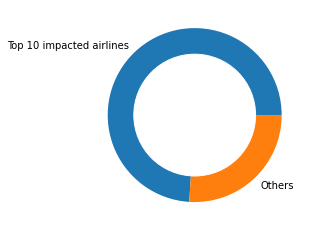

In [9]:
# create data
names=('Top 10 impacted airlines', 'Others')
size=[74,26]
 
plt.pie(size, labels=names)
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.savefig("images/Top10ImpactedAirlines.png")
plt.show()


## Market Analysis

In [10]:
# Create a column in the Flights DataFrame to join Year and Month 
Flights_df = flightdata

Flights_df['DATE'] = [date(year, month, 1) for year, month in zip(Flights_df['YEAR'], Flights_df['MONTH'])]
Flights_df

,UNIQUE_CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,ORIGIN_WAC,DEST,DEST_CITY_NAME,...,DEST_WAC,YEAR,QUARTER,MONTH,DISTANCE_GROUP,PASSENGERS,DISTANCE,CLASS,flight,DATE
0,Southwest Airlines Co.,PBI,"West Palm Beach/Palm Beach, FL",FL,Florida,US,United States,33,DAL,"Dallas, TX",...,74,2019,2,6,3,0.0,1091.0,F,PBIDAL,2019-06-01
1,Southwest Airlines Co.,PHL,"Philadelphia, PA",PA,Pennsylvania,US,United States,23,GEG,"Spokane, WA",...,93,2019,2,6,5,0.0,2155.0,F,PHLGEG,2019-06-01
2,Southwest Airlines Co.,PVD,"Providence, RI",RI,Rhode Island,US,United States,15,ATL,"Atlanta, GA",...,34,2019,2,6,2,0.0,903.0,F,PVDATL,2019-06-01
3,Southwest Airlines Co.,RIC,"Richmond, VA",VA,Virginia,US,United States,38,DEN,"Denver, CO",...,82,2019,2,6,3,0.0,1482.0,F,RICDEN,2019-06-01
4,Southwest Airlines Co.,RIC,"Richmond, VA",VA,Virginia,US,United States,38,LAS,"Las Vegas, NV",...,85,2019,2,6,5,0.0,2086.0,F,RICLAS,2019-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235100,Hawaiian Airlines Inc.,HNL,"Honolulu, HI",HI,Hawaii,US,United States,2,OGG,"Kahului, HI",...,2,2020,1,1,1,72962.0,100.0,F,HNLOGG,2020-01-01
235101,Delta Air Lines Inc.,ATL,"Atlanta, GA",GA,Georgia,US,United States,34,MCO,"Orlando, FL",...,33,2020,1,2,1,84608.0,404.0,F,ATLMCO,2020-02-01
235102,Delta Air Lines Inc.,MCO,"Orlando, FL",FL,Florida,US,United States,33,ATL,"Atlanta, GA",...,34,2020,1,2,1,85349.0,404.0,F,MCOATL,2020-02-01
235103,Delta Air Lines Inc.,ATL,"Atlanta, GA",GA,Georgia,US,United States,34,MCO,"Orlando, FL",...,33,2020,1,1,1,86715.0,404.0,F,ATLMCO,2020-01-01


In [11]:
# To set the date column as the index, so it plots chronologically:

Flights_df["DATE"] = pd.to_datetime(Flights_df["DATE"])
Flights_df.set_index("DATE", inplace=True)
Flights_df

,UNIQUE_CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,ORIGIN_WAC,DEST,DEST_CITY_NAME,...,DEST_COUNTRY_NAME,DEST_WAC,YEAR,QUARTER,MONTH,DISTANCE_GROUP,PASSENGERS,DISTANCE,CLASS,flight
DATE,,,,,,,,,,,,,,,,,,,,,
2019-06-01,Southwest Airlines Co.,PBI,"West Palm Beach/Palm Beach, FL",FL,Florida,US,United States,33,DAL,"Dallas, TX",...,United States,74,2019,2,6,3,0.0,1091.0,F,PBIDAL
2019-06-01,Southwest Airlines Co.,PHL,"Philadelphia, PA",PA,Pennsylvania,US,United States,23,GEG,"Spokane, WA",...,United States,93,2019,2,6,5,0.0,2155.0,F,PHLGEG
2019-06-01,Southwest Airlines Co.,PVD,"Providence, RI",RI,Rhode Island,US,United States,15,ATL,"Atlanta, GA",...,United States,34,2019,2,6,2,0.0,903.0,F,PVDATL
2019-06-01,Southwest Airlines Co.,RIC,"Richmond, VA",VA,Virginia,US,United States,38,DEN,"Denver, CO",...,United States,82,2019,2,6,3,0.0,1482.0,F,RICDEN
2019-06-01,Southwest Airlines Co.,RIC,"Richmond, VA",VA,Virginia,US,United States,38,LAS,"Las Vegas, NV",...,United States,85,2019,2,6,5,0.0,2086.0,F,RICLAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01,Hawaiian Airlines Inc.,HNL,"Honolulu, HI",HI,Hawaii,US,United States,2,OGG,"Kahului, HI",...,United States,2,2020,1,1,1,72962.0,100.0,F,HNLOGG
2020-02-01,Delta Air Lines Inc.,ATL,"Atlanta, GA",GA,Georgia,US,United States,34,MCO,"Orlando, FL",...,United States,33,2020,1,2,1,84608.0,404.0,F,ATLMCO
2020-02-01,Delta Air Lines Inc.,MCO,"Orlando, FL",FL,Florida,US,United States,33,ATL,"Atlanta, GA",...,United States,34,2020,1,2,1,85349.0,404.0,F,MCOATL


In [12]:
# Create DataFrame to show all International Flights

int_df = Flights_df[Flights_df['DEST_COUNTRY']!=Flights_df['ORIGIN_COUNTRY']].copy()
int_df

,UNIQUE_CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,ORIGIN_WAC,DEST,DEST_CITY_NAME,...,DEST_COUNTRY_NAME,DEST_WAC,YEAR,QUARTER,MONTH,DISTANCE_GROUP,PASSENGERS,DISTANCE,CLASS,flight
DATE,,,,,,,,,,,,,,,,,,,,,
2019-01-01,Tropic Ocean Airways LLC,FLL,"Fort Lauderdale, FL",FL,Florida,US,United States,33,BS3,"Baker Bay, The Bahamas",...,The Bahamas,204,2019,1,1,1,0.0,192.0,F,FLLBS3
2019-01-01,Cape Air,EIS,"Road Town, British Virgin Islands",NaN,NaN,VG,British Virgin Islands,282,STT,"Charlotte Amalie, VI",...,United States,4,2019,1,1,1,0.0,29.0,F,EISSTT
2019-01-01,Cape Air,STT,"Charlotte Amalie, VI",VI,U.S. Virgin Islands,US,United States,4,EIS,"Road Town, British Virgin Islands",...,British Virgin Islands,282,2019,1,1,1,0.0,29.0,F,STTEIS
2019-04-01,"Commutair Aka Champlain Enterprises, Inc.",ALB,"Albany, NY",NY,New York,US,United States,22,YUL,"Montreal, Canada",...,Canada,941,2019,2,4,1,0.0,188.0,F,ALBYUL
2019-04-01,"Commutair Aka Champlain Enterprises, Inc.",YUL,"Montreal, Canada",QC,Quebec,CA,Canada,941,ROC,"Rochester, NY",...,United States,22,2019,2,4,1,0.0,254.0,F,YULROC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01,Virgin Atlantic Airways,LHR,"London, United Kingdom",NaN,NaN,GB,United Kingdom,493,JFK,"New York, NY",...,United States,22,2020,1,1,7,34761.0,3452.0,F,LHRJFK
2020-02-01,British Airways Plc,LHR,"London, United Kingdom",NaN,NaN,GB,United Kingdom,493,JFK,"New York, NY",...,United States,22,2020,1,2,7,43513.0,3452.0,F,LHRJFK
2020-02-01,British Airways Plc,JFK,"New York, NY",NY,New York,US,United States,22,LHR,"London, United Kingdom",...,United Kingdom,493,2020,1,2,7,44180.0,3452.0,F,JFKLHR


In [13]:
# Create DataFrame to show all Domestic Flights

dom_df = Flights_df[Flights_df['DEST_COUNTRY']==Flights_df['ORIGIN_COUNTRY']].copy()
dom_df

,UNIQUE_CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,ORIGIN_WAC,DEST,DEST_CITY_NAME,...,DEST_COUNTRY_NAME,DEST_WAC,YEAR,QUARTER,MONTH,DISTANCE_GROUP,PASSENGERS,DISTANCE,CLASS,flight
DATE,,,,,,,,,,,,,,,,,,,,,
2019-06-01,Southwest Airlines Co.,PBI,"West Palm Beach/Palm Beach, FL",FL,Florida,US,United States,33,DAL,"Dallas, TX",...,United States,74,2019,2,6,3,0.0,1091.0,F,PBIDAL
2019-06-01,Southwest Airlines Co.,PHL,"Philadelphia, PA",PA,Pennsylvania,US,United States,23,GEG,"Spokane, WA",...,United States,93,2019,2,6,5,0.0,2155.0,F,PHLGEG
2019-06-01,Southwest Airlines Co.,PVD,"Providence, RI",RI,Rhode Island,US,United States,15,ATL,"Atlanta, GA",...,United States,34,2019,2,6,2,0.0,903.0,F,PVDATL
2019-06-01,Southwest Airlines Co.,RIC,"Richmond, VA",VA,Virginia,US,United States,38,DEN,"Denver, CO",...,United States,82,2019,2,6,3,0.0,1482.0,F,RICDEN
2019-06-01,Southwest Airlines Co.,RIC,"Richmond, VA",VA,Virginia,US,United States,38,LAS,"Las Vegas, NV",...,United States,85,2019,2,6,5,0.0,2086.0,F,RICLAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01,Hawaiian Airlines Inc.,HNL,"Honolulu, HI",HI,Hawaii,US,United States,2,OGG,"Kahului, HI",...,United States,2,2020,1,1,1,72962.0,100.0,F,HNLOGG
2020-02-01,Delta Air Lines Inc.,ATL,"Atlanta, GA",GA,Georgia,US,United States,34,MCO,"Orlando, FL",...,United States,33,2020,1,2,1,84608.0,404.0,F,ATLMCO
2020-02-01,Delta Air Lines Inc.,MCO,"Orlando, FL",FL,Florida,US,United States,33,ATL,"Atlanta, GA",...,United States,34,2020,1,2,1,85349.0,404.0,F,MCOATL


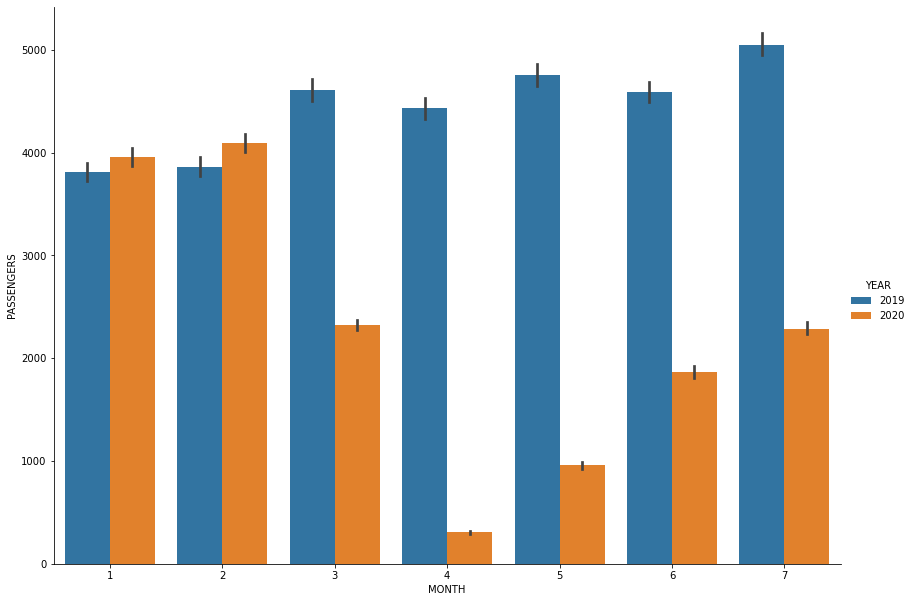

In [14]:
# Generate a bar graph showing the total number of Flights for 2019 and 2020 to show contrast

sns.catplot(x='MONTH', y='PASSENGERS', hue='YEAR', kind='bar', data=Flights_df, height=8.27, aspect=11.7/8.27);
plt.savefig("images/AllFlightCounts_2019vs2020.png")

The above graph shows how Covid-19 has effected all flights (foreign and domestic) through July 31, 2020. As the world went on lockdown it shows how flights almost came to a complete stop and how as the world opens up the amount of flights is starting getting back to where it was prior to the pandemic. 

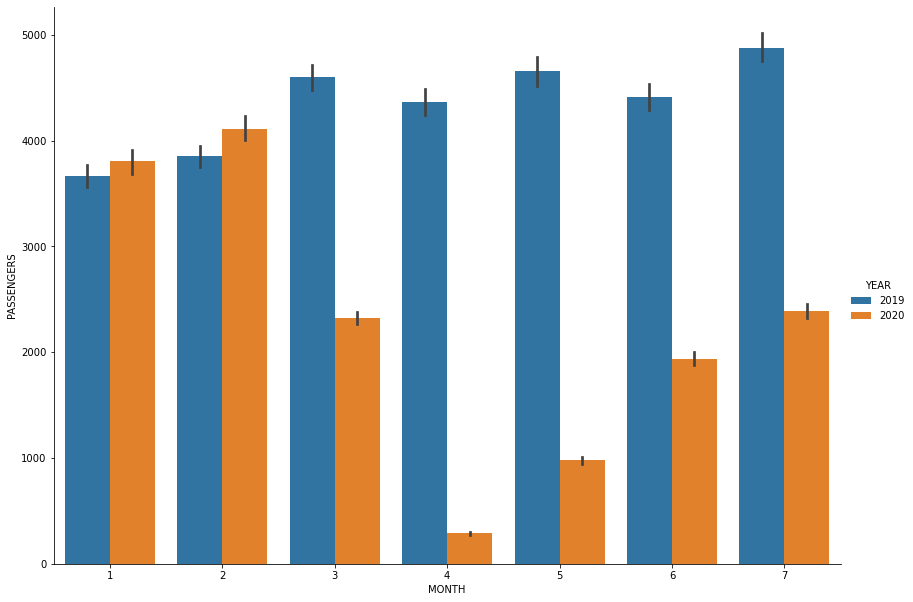

In [15]:
# Generate a bar graph showing the total number of Domestic Flights for 2019 and 2020 to show contrast

sns.catplot(x='MONTH', y='PASSENGERS', hue='YEAR', kind='bar', data=dom_df, height=8.27, aspect=11.7/8.27);
plt.savefig("images/DomesticFlightCounts_2019vs2020.png")

The above graph shows the contrast of Domestic Flights from 2019 through July 31, 2020. Conisistent with the overall graph this graph shows that as the Lockdown happened in March 2020 flights almost came to a hault in the United States. As well as when the rules of the Lockdown eased the numbers started to creep back up and are slowly on their way increasing as the year progresses.

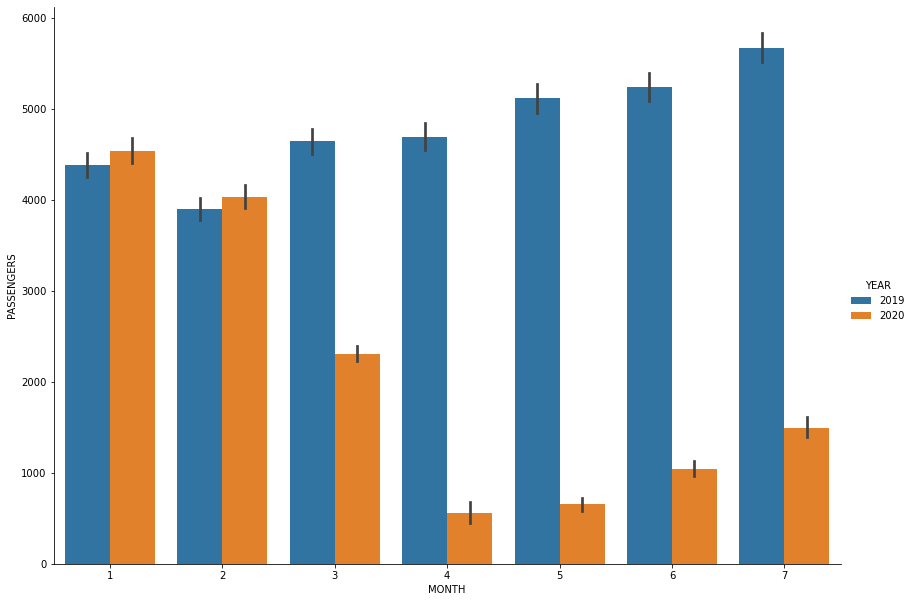

In [16]:
# Generate a bar plot showing the total number of International Flights for 2019 and 2020 to show contrast.

sns.catplot(x='MONTH', y='PASSENGERS', hue='YEAR', kind='bar', data=int_df, height=8.27, aspect=11.7/8.27);
plt.savefig("images/InternationalFlightCounts_2019vs2020.png")

The graph above shows the contrast of International Flights from 2019 through July 31, 2020. It also shows how the pandemic has effected travel and to look deeper the reason that International Flights may be increasing at a slower rate is that other countries have harsher Lockdown rules and the implementation of quarantine rules once in a country may be the reason for this slow progression. 

## Destination Analysis

In [17]:
flightchangesgrp = flightdata.groupby(['flight','YEAR'], as_index = False).agg({'PASSENGERS':'sum'})
flightchanges = pd.DataFrame(flightchangesgrp.pivot(index='flight', columns='YEAR', values='PASSENGERS').fillna(0))
flightchanges['% Δ'] = flightchanges.pct_change(axis='columns').iloc[:, -1]

# drop infinity and na values
flightchanges = flightchanges.loc[(flightchanges['% Δ']!=float("inf")),:].dropna(subset=['% Δ'])

# create bins for % change categories
binlabels = ['-76 to -100% Δ', '-51 to -75% Δ', '-26 to -50% Δ', '-1 to -25% Δ','No Δ','1 to 100% Δ', '> 100% Δ']
cut_bins = [-1,-0.75,-0.5,-0.25,-0.01,0.01,1,float("inf")]

# add column and calculate category
flightchanges['Δ Category'] = pd.cut(flightchanges['% Δ'], bins=cut_bins, labels=binlabels)

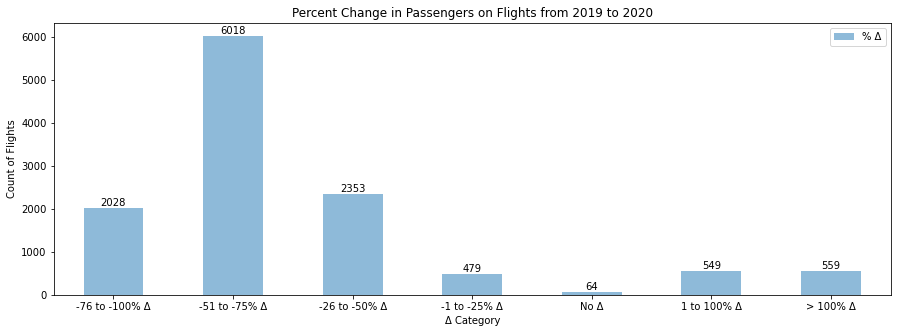

In [18]:
summarychangesgrp = flightchanges.groupby('Δ Category').agg({'% Δ':'count'}) 

summary_changes_bar = summarychangesgrp.plot.bar(figsize=(15,5), alpha=0.5, align="center", title="Percent Change in Passengers on Flights from 2019 to 2020")
summary_changes_bar.set_xticklabels(summarychangesgrp.index, rotation=0)
summary_changes_bar.set_ylabel("Count of Flights")
for bar in summary_changes_bar.patches:
    summary_changes_bar.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                    xytext=(0, 5), 
                   textcoords='offset points')
plt.savefig("images/PercentChangeInFlightPassengers2019-2020.png")

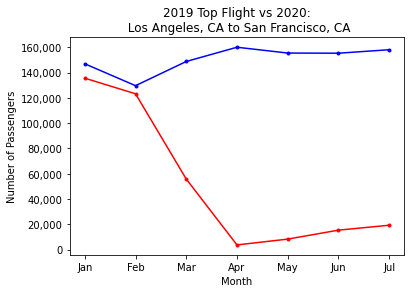

In [19]:
# get flight that had the most passengers in 2019 and saw the greatest decrease 
# plot as line charts with pct_change over months for 2019 and 2020

# top flight in 2019
topflight = flightchanges.sort_values(by=[2019,'% Δ'], ascending=[False,True]).head(1)

mthly_flightchangesgrp = flightdata.groupby(['flight','ORIGIN_CITY_NAME','DEST_CITY_NAME','YEAR','MONTH'], as_index = False).agg({'PASSENGERS':'sum'})
mthly_flightchangesgrp.columns
mthly_flightchangesgrp

# # get data for jan - july passengers in each year from original df
topflight_ext = topflight.merge(mthly_flightchangesgrp, how='inner', on='flight')
topflight_ext

# set x_axis for line plot
x_axis = np.arange(1,8,1)
passengers2019 = topflight_ext.loc[topflight_ext['YEAR']==2019,'PASSENGERS']
passengers2020 = topflight_ext.loc[topflight_ext['YEAR']==2020,'PASSENGERS']
monthlist = ['Jan','Feb','Mar','Apr','May','Jun','Jul']

# create figure with subplots for two lines and plot lines with a secondary y axis and axis titles color coded to line color instead of legend
fig2, ax1 = plt.subplots()
ax1.plot(x_axis,passengers2019, marker='.', color='blue', label='2019 Passengers')
ax1.set_title(f"2019 Top Flight vs 2020:\n {topflight_ext['ORIGIN_CITY_NAME'].iloc[0]} to {topflight_ext['DEST_CITY_NAME'].iloc[0]}")
ax1.set_xlabel("Month")
ax1.set_ylabel("Number of Passengers")
ax1.plot(x_axis,passengers2020, marker='.', color='red', label='2020 Passengers')
ax1.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(x_axis,monthlist)
plt.savefig("images/TopFlightPassengersByMonth2019-2020.png")
plt.show()

In [24]:
# get lat longs of cities to generate heatmap of mean percent change for each destination
citygrp = flightdata.groupby(['flight','DEST_CITY_NAME'], as_index = False).agg({'DISTANCE':'mean'})
citydata = citygrp.merge(flightchanges, how='inner', on='flight')
mapdata = pd.DataFrame(citydata.groupby(['DEST_CITY_NAME'], as_index = False).agg({'% Δ':'mean'}))
mapdata['lat'] = 0.0
mapdata['long'] = 0.0

#get lat and longs for each city
for index, row in mapdata.iterrows():
    # Target city
    target_city = row['DEST_CITY_NAME']

    # Build the endpoint URL
    target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
        'address={0}&key={1}').format(target_city, g_key)
    
    # Run a request to endpoint and convert result to json
    geo_data = requests.get(target_url).json()      
#     print(json.dumps(geo_data, indent=4, sort_keys=True))
#     break
    # Extract latitude and longitude
    try:
        lat = geo_data["results"][0]["geometry"]["location"]["lat"]
        lng = geo_data["results"][0]["geometry"]["location"]["lng"]
    except:
        continue
#     print(lat,lng,target_city)
    mapdata.loc[index, 'lat'] = lat
    mapdata.loc[index, 'long'] = lng


45.4646985 -98.4864829 Aberdeen, SD
32.4487364 -99.73314390000002 Abilene, TX
24.453884 54.3773438 Abu Dhabi, United Arab Emirates
16.8531086 -99.8236533 Acapulco, Mexico
5.6037168 -0.1869644 Accra, Ghana
51.7615874 -176.6217472 Adak Island, AK
8.9806034 38.7577605 Addis Ababa, Ethiopia
18.4274454 -67.1540698 Aguadilla, PR
21.8852562 -102.2915677 Aguascalientes, Mexico
56.9455556 -154.1702778 Akhiok, AK
60.9094444 -161.4313889 Akiachak, AK
60.9122222 -161.2138889 Akiak, AK
41.0814447 -81.51900529999999 Akron, OH
54.19128809999999 -165.5523374 Akun, AK
54.1355556 -165.7730556 Akutan, AK
62.68888889999999 -164.6152778 Alakanuk, AK
37.4694491 -105.8700214 Alamosa, CO
31.5785074 -84.15574099999999 Albany, GA
42.6525793 -73.7562317 Albany, NY
35.0843859 -106.650422 Albuquerque, NM
31.3112936 -92.4451371 Alexandria, LA
66.5655556 -152.6455556 Allakaket, AK
40.58336389999999 -75.50437610000002 Allentown/Bethlehem/Easton, PA
42.0930235 -102.8702006 Alliance, NE
45.0616794 -83.4327528 Alpena, M

32.7766642 -96.79698789999999 Dallas, TX
32.7078751 -96.9209135 Dallas/Fort Worth, TX
26.4206828 50.0887943 Dammam, Saudi Arabia
39.7589478 -84.1916069 Dayton, OH
29.2108147 -81.0228331 Daytona Beach, FL
70.20019959999999 -148.4597191 Deadhorse, AK
39.8403147 -88.9548001 Decatur, IL
66.0755556 -162.7172221 Deering, AK
29.3708857 -100.8958674 Del Rio, TX
28.7040592 77.10249019999999 Delhi, India
39.7392358 -104.990251 Denver, CO
41.5868353 -93.6249593 Des Moines, IA
30.3935337 -86.4957833 Destin, FL
42.331427 -83.0457538 Detroit, MI
48.112779 -98.86512019999999 Devils Lake, ND
46.8791756 -102.7896242 Dickinson, ND
59.03972219999999 -158.4575 Dillingham, AK
37.7527982 -100.0170787 Dodge City, KS
25.2854473 51.53103979999999 Doha, Qatar
61.17765180000001 -149.889812 Donlin Creek Mine, AK
31.2232313 -85.3904888 Dothan, AL
41.1210115 -78.7583257 DuBois, PA
25.2048493 55.2707828 Dubai, United Arab Emirates
53.3498053 -6.2603097 Dublin, Ireland
42.65066059999999 18.0944238 Dubrovnik, Croatia


40.69933030000001 -99.0816784 Kearney, NE
63.98148690000001 -22.6281862 Keflavik/Reykjavik, Iceland
49.8879519 -119.4960106 Kelowna, Canada
60.55444439999999 -151.2583333 Kenai, AK
47.7583576 -122.2496863 Kenmore, WA
55.34222219999999 -131.6461112 Ketchikan, AK
24.5550593 -81.7799871 Key West, FL
66.97058609999999 -160.4397437 Kiana, AK
50.4501 30.5234 Kiev, Ukraine
31.1171194 -97.72779589999999 Killeen, TX
55.0616667 -162.3102777 King Cove, AK
58.68832510000001 -156.661351 King Salmon, AK
18.0178743 -76.8099041 Kingston, Jamaica
59.9401747 -164.0833318 Kipnuk, AK
40.19475389999999 -92.5832496 Kirksville, MO
58.194464 -152.3538209 Kitoi Bay, AK
67.72694430000001 -164.5333333 Kivalina, AK
55.5522222 -133.0958333 Klawock, AK
35.9606384 -83.9207392 Knoxville, TN
66.90722219999999 -156.8811111 Kobuk, AK
57.49124629999999 -153.495022 Kodiak Island, AK
57.79000000000001 -152.4072221 Kodiak, AK
59.4394444 -154.7761111 Kokhanok, AK
59.7286111 -157.2844445 Koliganek, AK
19.639994 -155.9969261 K

34.6937249 135.5022535 Osaka, Japan
59.9138688 10.7522454 Oslo, Norway
45.4215296 -75.69719309999999 Ottawa, Canada
57.9236111 -152.5022222 Ouzinkie, AK
37.7719074 -87.1111676 Owensboro, KY
57.92078890000001 -134.3722167 Pack Creek, AK
37.0833893 -88.6000478 Paducah, KY
36.91472220000001 -111.4558333 Page, AZ
-14.2756319 -170.7020359 Pago Pago, TT
33.8302961 -116.5452921 Palm Springs, CA
30.1588129 -85.6602058 Panama City, FL
8.9823792 -79.51986959999999 Panama City, Panama
-17.5324608 -149.5677151 Papeete, French Polynesia
48.856614 2.3522219 Paris, France
39.2667418 -81.56151349999999 Parkersburg, WV
46.2086683 -119.119948 Pasco/Kennewick/Richland, WA
59.7872222 -154.106111 Pedro Bay, AK
57.9608333 -136.2275 Pelican, AK
45.552789 -84.7839364 Pellston, MI
45.672075 -118.7885967 Pendleton, OR
30.42130899999999 -87.2169149 Pensacola, FL
40.6936488 -89.5889864 Peoria, IL
4.8087174 -75.690601 Pereira, Colombia
55.91277780000001 -159.1455556 Perryville, AK
56.8125 -132.9555556 Petersburg, 

KeyboardInterrupt: 

In [25]:
#create heatmap showing the absolute value of percent change by city
gmaps.configure(api_key=g_key)
figure_layout = {
    'width': '600px',
    'height': '400px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

mapdata['abs_per_chg'] = mapdata['% Δ'].abs()

locations = mapdata[['lat','long']].astype(float)
weights = mapdata['abs_per_chg'].astype(float)


heat_layer = gmaps.heatmap_layer(locations, 
                                 weights=weights, 
                                 dissipating=False, max_intensity=100,
                                 point_radius=5
                                )

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(border='1px solid black', height='400px', margin='0 auto 0 auto', padding='1px', wi…

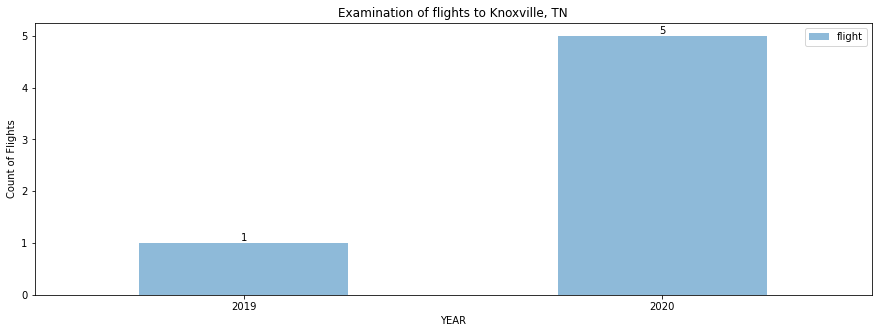

In [26]:
# deeper look at the hot spots on the east coast Knoxville, TN and Sarasota/Bradenton, FL
knoxville = pd.DataFrame(citydata.loc[citydata.DEST_CITY_NAME=='Knoxville, TN',:].sort_values(by='% Δ',ascending = False).head(1))
top1 = knoxville.flight.iloc[0]

knoxville_top1 = flightdata.loc[flightdata.flight==top1,:].sort_values(by=['YEAR','MONTH'])
knoxville_flights = knoxville_top1.groupby(["YEAR"]).agg({'flight':'count'})
knoxville_passengers = knoxville_top1.groupby(["YEAR"]).agg({'PASSENGERS':'sum'})

knoxville_flights_bar = knoxville_flights.plot.bar(figsize=(15,5), alpha=0.5, align="center", title="Examination of flights to Knoxville, TN")
knoxville_flights_bar.set_xticklabels(knoxville_flights.index, rotation=0)
knoxville_flights_bar.set_ylabel("Count of Flights")
for bar in knoxville_flights_bar.patches:
    knoxville_flights_bar.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                    xytext=(0, 5), 
                   textcoords='offset points')
plt.savefig("images/KnoxvilleFlights2019-2020.png")

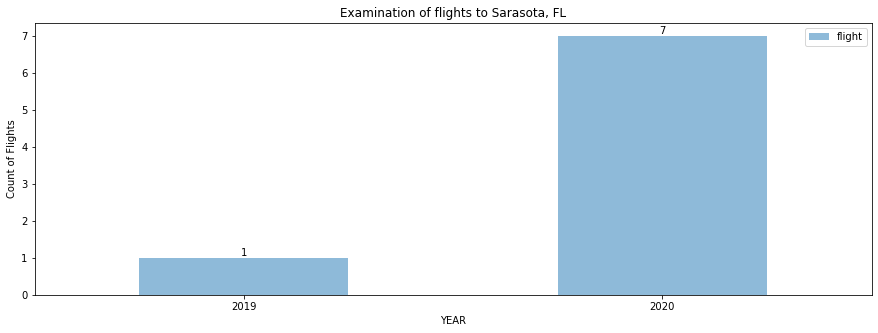

In [27]:
sarasota = pd.DataFrame(citydata.loc[citydata.DEST_CITY_NAME=='Sarasota/Bradenton, FL',:].sort_values(by='% Δ',ascending = False).head(1))
sarasota

# flightdata.columns

# floridaflights = flightdata.loc[flightdata.DEST_STATE_ABR=='FL',:].sort_values(by=['DEST_CITY_NAME'])
# floridaflights.DEST_CITY_NAME.value_counts()

top1 = sarasota.flight.iloc[0]

sarasota_top1 = flightdata.loc[flightdata.flight==top1,:].sort_values(by=['YEAR','MONTH'])

sarasota_flights = sarasota_top1.groupby(["YEAR"]).agg({'flight':'count'})
sarasota_passengers = sarasota_top1.groupby(["YEAR"]).agg({'PASSENGERS':'sum'})

sarasota_flights_bar = sarasota_flights.plot.bar(figsize=(15,5), alpha=0.5, align="center", title="Examination of flights to Sarasota, FL")
sarasota_flights_bar.set_xticklabels(sarasota_flights.index, rotation=0)
sarasota_flights_bar.set_ylabel("Count of Flights")
for bar in sarasota_flights_bar.patches:
    sarasota_flights_bar.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                    xytext=(0, 5), 
                   textcoords='offset points')
plt.savefig("images/SarasotaFlights2019-2020.png")

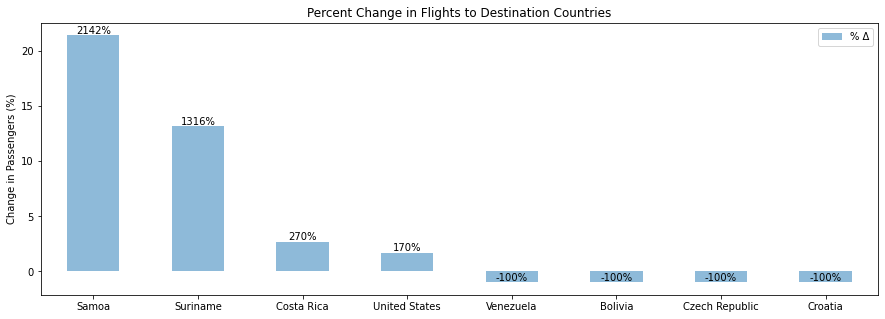

In [28]:
statsgrp = flightdata.groupby(['flight','ORIGIN_COUNTRY_NAME','DEST_COUNTRY_NAME'], as_index = False).agg({'DISTANCE':'mean'})

# merge statsgrp with flight changes to get delta and distance together
statsdata = statsgrp.merge(flightchanges, how='inner', on='flight')

destinationgrp = statsdata.groupby(['DEST_COUNTRY_NAME'], as_index=False).agg({'% Δ':'mean'})
destinationgrp['abs_per_chg'] = destinationgrp['% Δ'].abs()
plotdata_sort = destinationgrp.sort_values(by='abs_per_chg',ascending = False)
plotdata_filter = plotdata_sort.loc[plotdata_sort.abs_per_chg>=1]
plotdata = plotdata_filter[['DEST_COUNTRY_NAME','% Δ']]

bar = plotdata.plot.bar(figsize=(15,5), alpha=0.5, align="center", title="Percent Change in Flights to Destination Countries")
bar.set_xticklabels(plotdata.DEST_COUNTRY_NAME, rotation=0)
bar.set_ylabel("Change in Passengers (%)")
for b in bar.patches:
    bar.annotate(format(b.get_height(), f'{0:.2f}%'),  
                   (b.get_x() + b.get_width() / 2,  
                    b.get_height()), ha='center', va='center', 
                    xytext=(0, 5), 
                   textcoords='offset points')
plt.savefig("images/PercentChange_DestinationCountries.png")



### T Tests

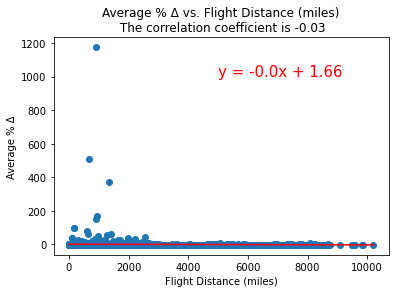

In [29]:
# linear regression for distance vs avg percent change

linregdata = statsdata.groupby('DISTANCE', as_index = False).agg({'% Δ':'mean'})

x_values = linregdata["DISTANCE"]
y_values = linregdata["% Δ"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# calculate correlation
correlation = stats.pearsonr(x_values,y_values)

# add to previous plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5000,1000),fontsize=15,color="red")
plt.title(f"Average % Δ vs. Flight Distance (miles)\n The correlation coefficient is {round(correlation[0],2)}")
plt.xlabel('Flight Distance (miles)')
plt.ylabel('Average % Δ')

# save fig
plt.savefig("images/LineRegress_Correlation_Distance_PercentChange.png")
plt.show()


There is a weak negative correlation between distance and percent change in passengers.

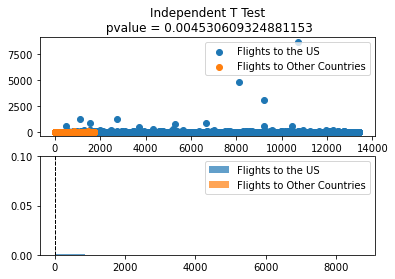

In [30]:
#independent t test comparing flights to the US and flights to other countries
population1 = statsdata[statsdata['DEST_COUNTRY_NAME']=='United States']['% Δ']
population2 = statsdata[statsdata['DEST_COUNTRY_NAME']!='United States']['% Δ']

# Calculate Independent (Two Sample) t-test
result = stats.ttest_ind(population1, population2, equal_var=False)

# Scatter Plot of Data
plt.subplot(2, 1, 1)
plt.scatter(range(len(population1)), population1, label="Flights to the US")
plt.scatter(range(len(population2)), population2, label="Flights to Other Countries")
plt.legend()
plt.title(f'Independent T Test\n pvalue = {result[1]}')

# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(population1, 10, density=True, alpha=0.7, label="Flights to the US")
plt.hist(population2, 10, density=True, alpha=0.7, label="Flights to Other Countries")
plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend() 

# save fig
plt.savefig("images/IndTTest_DestinationComparison.png")
plt.show()

The difference in means is statistically significant.